# **WINE QUALITY PREDICTION**

## 1.DATA SET STUDY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 2.EDA

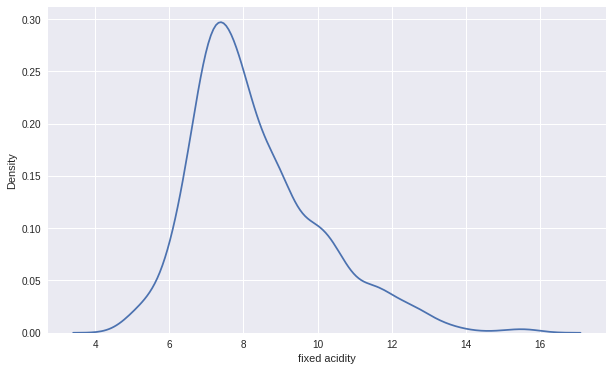

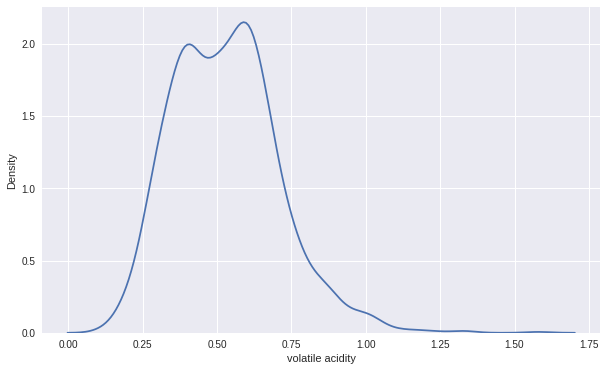

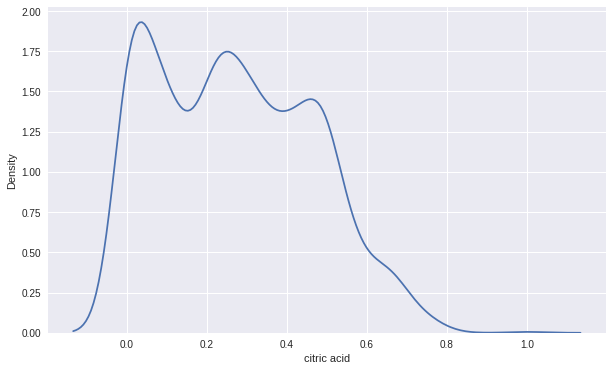

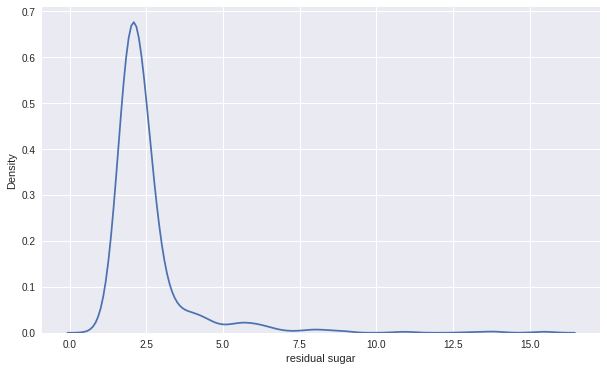

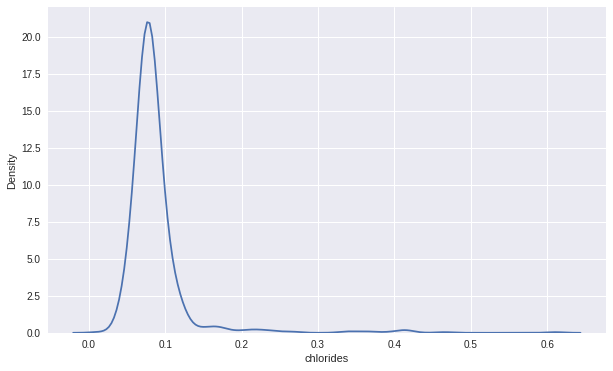

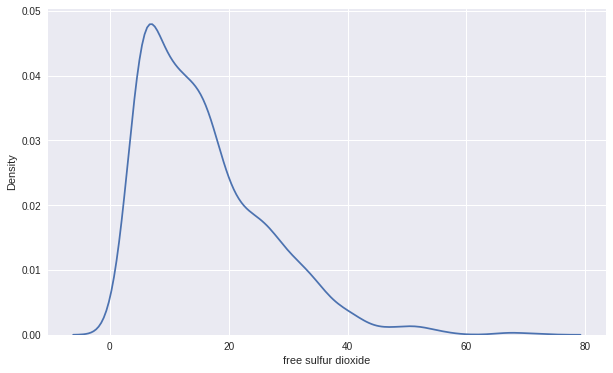

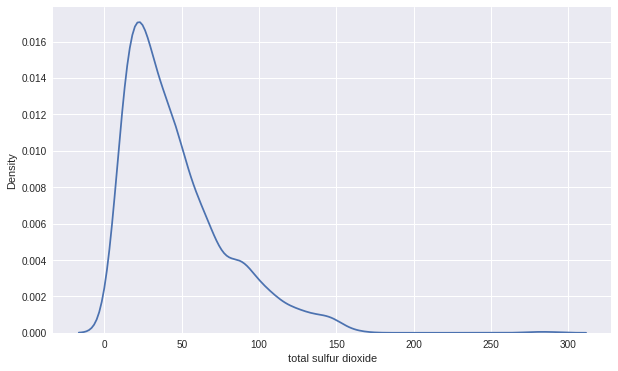

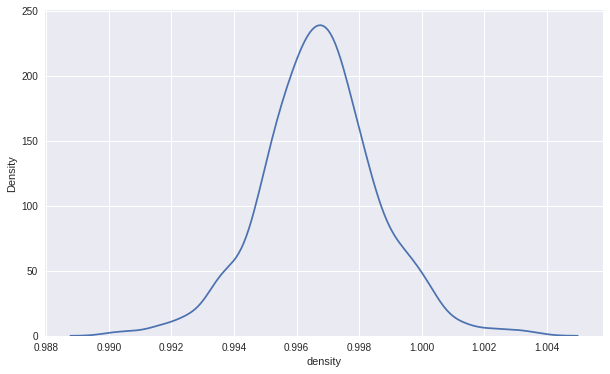

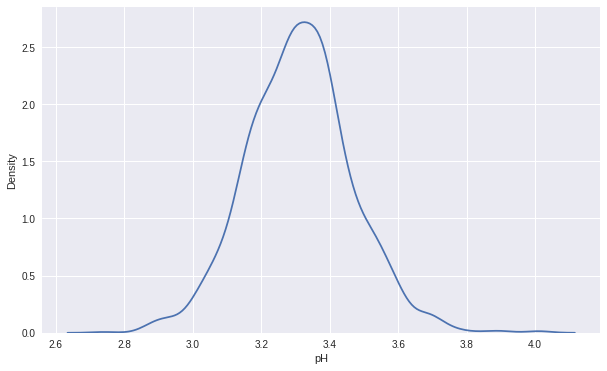

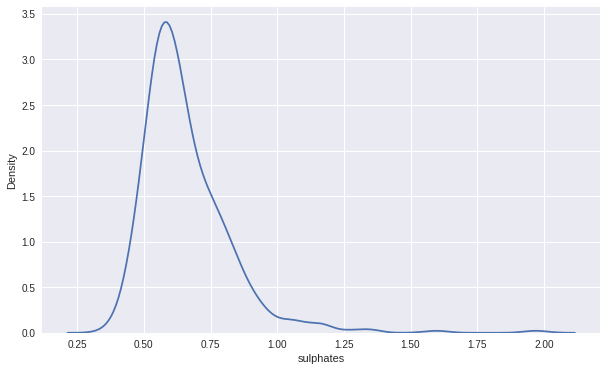

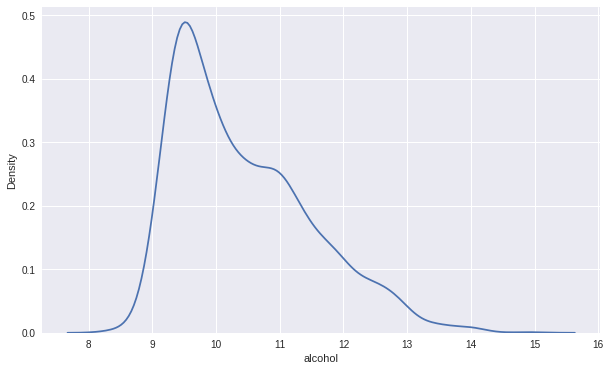

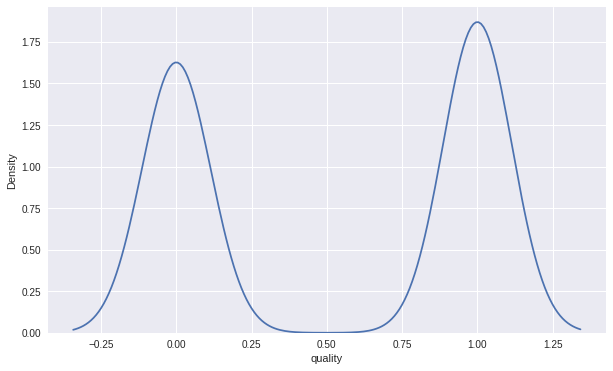

In [46]:
for i in data.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(data[i])

No handles with labels found to put in legend.


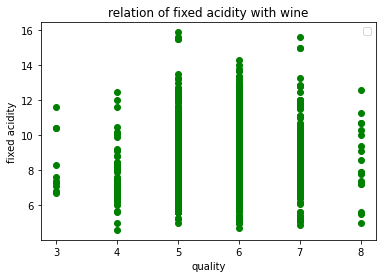

In [6]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(data['quality'], data['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

No handles with labels found to put in legend.


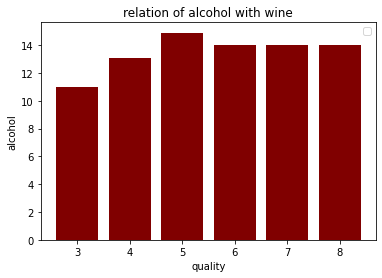

In [7]:
# checking the variation of fixed acidity in the different qualities of wine

plt.bar(data['quality'], data['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

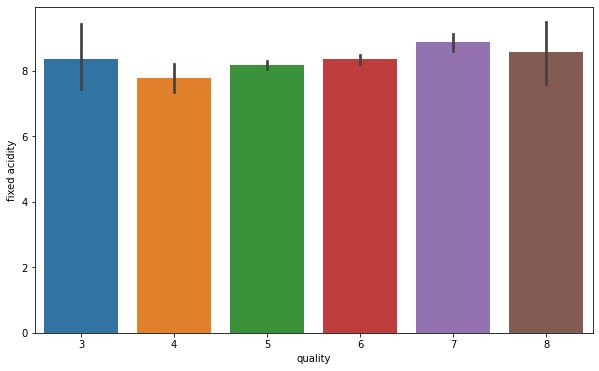

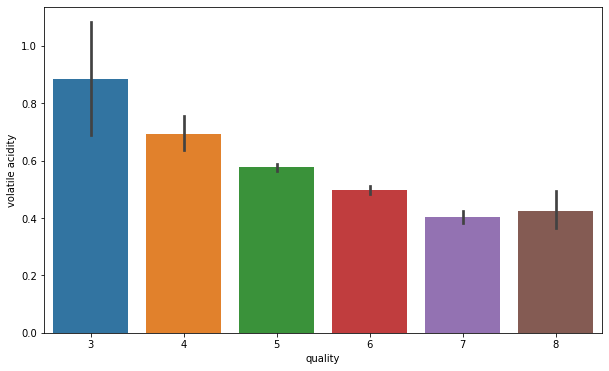

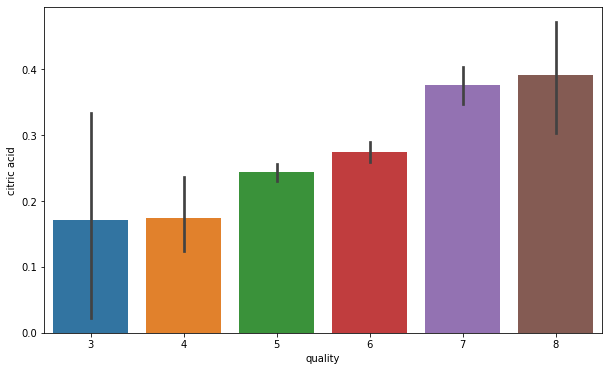

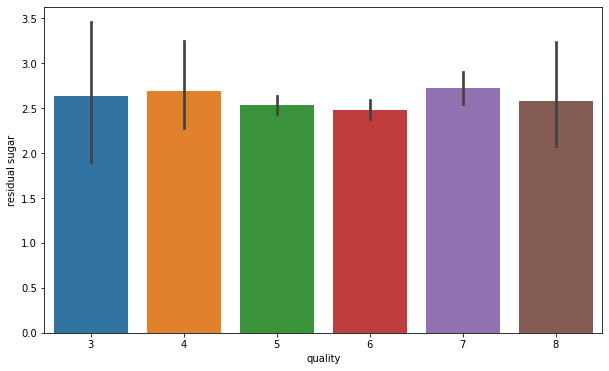

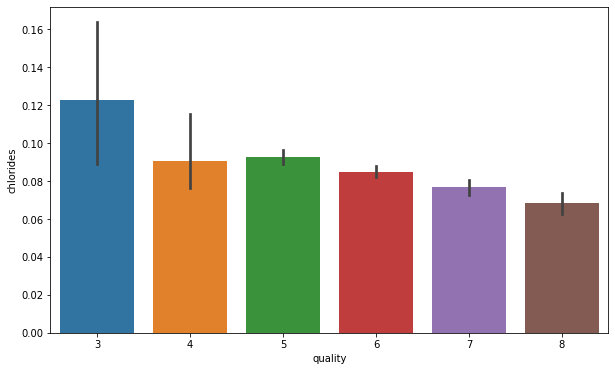

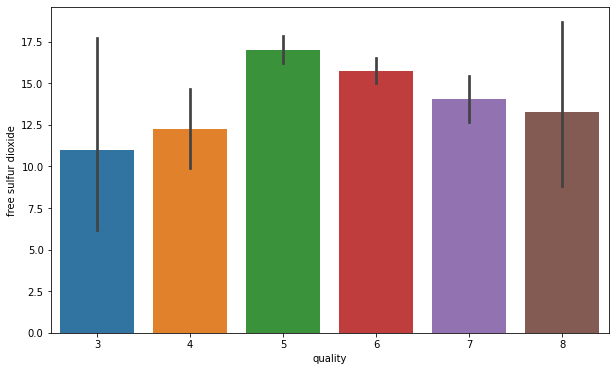

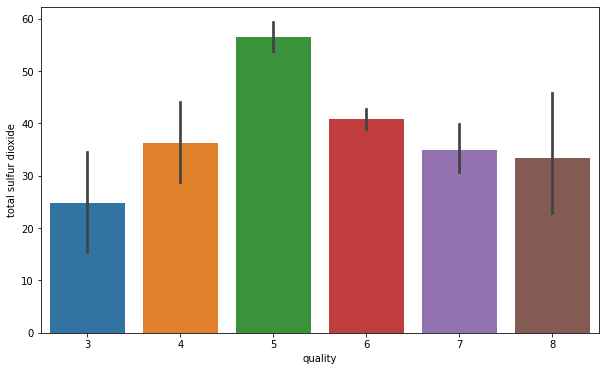

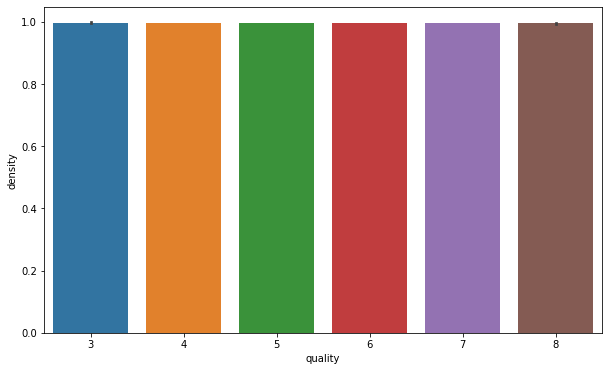

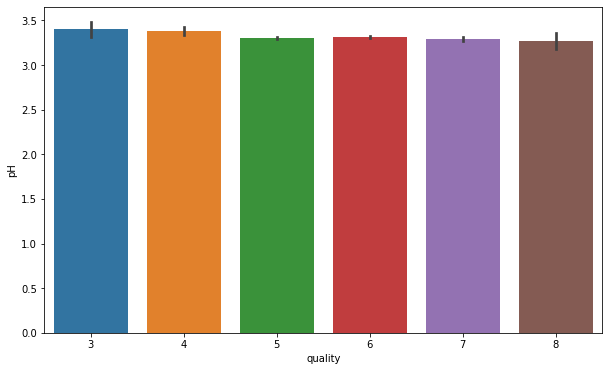

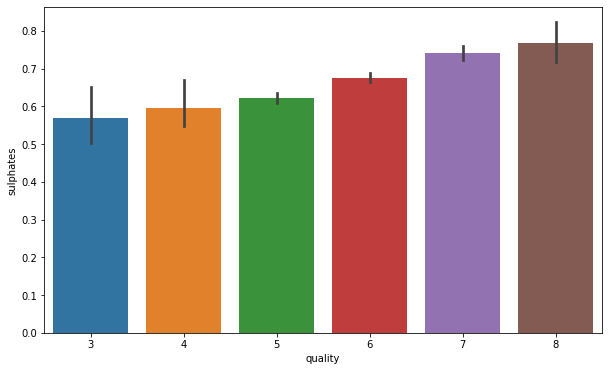

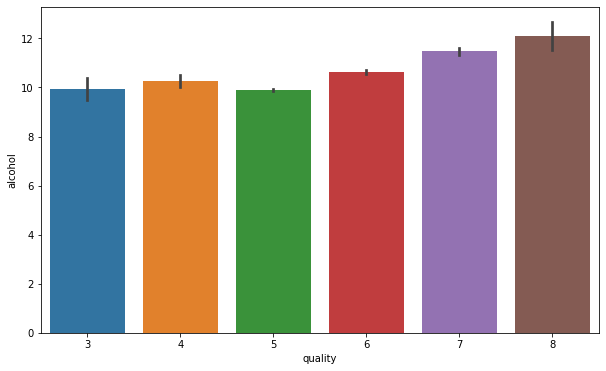

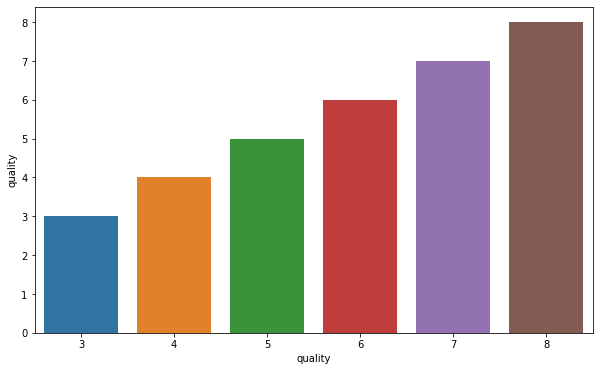

In [8]:
for i in data.columns:
  fig = plt.figure(figsize = (10,6))
  sns.barplot(x = 'quality', y = i, data = data)

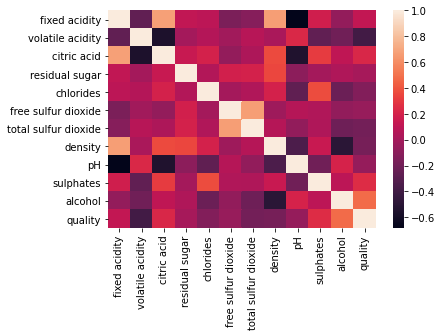

In [9]:
data_corr=data.corr()
sns.heatmap(data_corr)

From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other. For Example,

The strongly correlated items are :
1.fixed acidity and citric acid. 2.free sulphur dioxide and total sulphor dioxide. 3.fixed acidity and density.

alcohol and quality.
so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

The weekly correlated items are :
1.citric acid and volatile acidity. 2.fixed acidity and ph. 3.density and alcohol.

These are some relations which do not depend on each other at all.

In [10]:
data_corr["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Independent variables that are Highly correlated with Quality are alcohol, volatile acidity.

In [11]:
print(data['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Quality column should be divided into good and bad 

## 3.PRE PREPROCESSING

In [12]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Binning

In [13]:
# converting the response variables(3-7) as binary response variables that is either good or bad

#names = ['bad', 'good']
#bins = (2, 6.5, 8)

#data['quality'] = pd.cut(data['quality'], bins = bins, labels = names)

data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [14]:
# analyzing the different values present in the dependent variable(quality column)
data['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

### Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['quality'] = le.fit_transform(data['quality'])

data['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


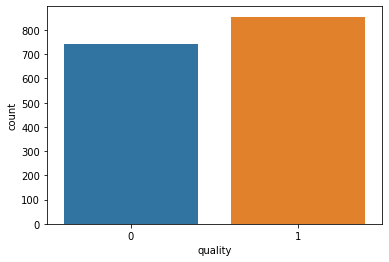

In [16]:
sns.countplot(data['quality'])

In [17]:
# dividing the dataset into dependent and independent variables

x = data.iloc[:,:11]
y = data.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [18]:
# dividing the dataset in training and testing set

#from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


### Scaling 

In [19]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## 4.Model construction

### LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score



# creating the model
model_lr = LogisticRegression()

# feeding the training set into the model
model_lr.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lr.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_lr.score(x_train, y_train))
print("Testing accuracy :", model_lr.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7472894078398665
Testing accuracy : 0.7225
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       204
           1       0.70      0.76      0.73       196

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

[[141  63]
 [ 48 148]]


In [21]:
lr_cv=cross_val_score(model_lr,x,y,scoring='accuracy', cv = 3).mean()
lr_cv

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7235772357723578

### RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model_rfc = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model_rfc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_rfc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_rfc.score(x_train, y_train))
print("Testing accuracy :", model_rfc.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.79


In [23]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       204
           1       0.77      0.82      0.79       196

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

[[155  49]
 [ 35 161]]


In [24]:
#Now lets try to do some evaluation for random forest model using cross validation.

rfc_cv = cross_val_score(estimator = model_rfc, X = x_train, y = y_train, cv = 10)
rfc_cv.mean()

0.8107352941176471

### SVC

In [25]:
from sklearn.svm import SVC

# creating the model
model_svc = SVC()

# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))

Training accuracy : 0.8098415346121768
Testing accuracy : 0.73


In [26]:
svc_cv = cross_val_score(estimator = model_svc, X = x_train, y = y_train, cv = 10)
svc_cv.mean()

0.7681792717086834

### DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.74


In [28]:
#Now lets try to do some evaluation for decision tree model using cross validation.

dt_cv = cross_val_score(estimator = model_dt, X = x_train, y = y_train, cv = 10)
dt_cv.mean()

0.735672268907563

Finding Best model

In [56]:
print("LOGISTIC REGG   ",model_lr.score(x_test, y_test),"     ",round(lr_cv.mean(),2),"       ", round(model_lr.score(x_test, y_test)-lr_cv.mean(),3))
print("RANDOM FOREST   ",model_rfc.score(x_test, y_test),"      ",round(rfc_cv.mean(),2),"       ", round(model_rfc.score(x_test, y_test)-rfc_cv.mean(),3))
print("SVC             ",model_svc.score(x_test, y_test),"      ",round(svc_cv.mean(),2),"       ", round(model_svc.score(x_test, y_test)-svc_cv.mean(),3))
print("DTREE           ",model_rfc.score(x_test, y_test),"      ",round(dt_cv.mean(),2),"       ", round(model_dt.score(x_test, y_test)-dt_cv.mean(),3))

LOGISTIC REGG    0.7225       0.72         -0.001
RANDOM FOREST    0.79        0.81         -0.021
SVC              0.73        0.77         -0.038
DTREE            0.79        0.74         0.004


The best model accoding to accuracy score- cross validation sccore is "LOGISTIC REGRESSION" since it is having least difference

## 5. Hyper Parameter tuning

In [30]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(x_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7522803347280335


In [31]:
# creating the model
model = LogisticRegression(C= 0.05179474679231213)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lr.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7481234361968306
Testing accuracy : 0.7325
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       204
           1       0.70      0.76      0.73       196

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

[[141  63]
 [ 48 148]]


## 6.Evaluation

AUC ROC CURVE

In [42]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


model1 = LogisticRegression(C= 0.05179474679231213)


# fit model
model1.fit(x_train, y_train)


# predict probabilities
pred_prob1 = model1.predict_proba(x_test)


In [43]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [44]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)

0.8007452981192478


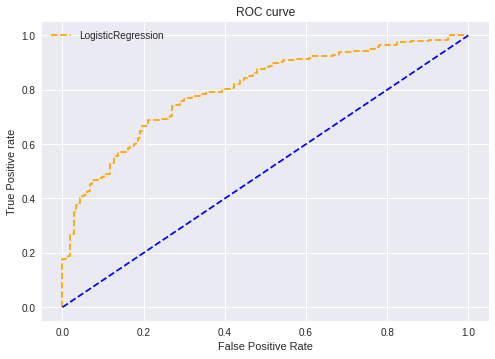

In [45]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LogisticRegression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 7.Saving the model

In [48]:
import joblib
joblib.dump(model,"final model.pkl")

['final model.pkl']